In [23]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from countries import get_country_list

# Problems

## Why protected areas above 100%

Some countries have some protected areas recorded as points with a reported area. This point data is more uncertain than protected areas reported as polygons because overlaps cannot be identified or resolved. For this reason the total for countries is provided with and without the inclusion of the total reported area of protected areas recorded as points. The reported area of protected areas recorded as points can (individually or cumulatively) exceed the reference area used to calculate these indicators so coverages of greater than 100% can sometimes be reported.

## Last update 

June 2020

## Historical data

Not all protected areas have a designation date recorded. When there is no designation date the protected area is deemed to have always existed, therefore historical data maybe be overestimated.


# Load Data

## Protected Area by management objective

Total for category is the total area protected under that IUCN management designation. Note that because overlaps among protected areas are relatively common, the total protected area for a country is typically less than the sum of the disaggregated areas.

In [24]:
DATA_PATH = Path('./data')
PROTECTED_AREAS = DATA_PATH / 'OECD' / 'PROTECTED_AREAS_OBJECTIVE.csv'

protected_area = pd.read_csv(PROTECTED_AREAS)

In [25]:
protected_area.shape

(71910, 23)

In [26]:
protected_area.head()

,COU,Country,DESIG,Designation,DOMAIN,Domain,MEASURE,Measure,CALCULATION,Calculation method,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1970,KM2,Square kilometres,0,Units,NaN,NaN,34770.33,NaN,NaN
1,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1980,KM2,Square kilometres,0,Units,NaN,NaN,103556.25,NaN,NaN
2,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1990,KM2,Square kilometres,0,Units,NaN,NaN,127115.19,NaN,NaN
3,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1995,KM2,Square kilometres,0,Units,NaN,NaN,133699.95,NaN,NaN
4,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,2000,KM2,Square kilometres,0,Units,NaN,NaN,136012.95,NaN,NaN


In [27]:
# unique values per column
protected_area.nunique()

COU                        127
Country                    127
DESIG                        9
Designation                  9
DOMAIN                       2
Domain                       2
MEASURE                      2
Measure                      2
CALCULATION                  1
Calculation method           1
SCOPE                        1
Scope                        1
YEA                         17
Year                        17
Unit Code                    2
Unit                         2
PowerCode Code               1
PowerCode                    1
Reference Period Code        0
Reference Period             0
Value                    10090
Flag Codes                   0
Flags                        0
dtype: int64

In [28]:
# filter only Terrestrial protected area
protected_area = protected_area[protected_area['Domain'] == 'Terrestrial']
protected_area.shape

(37944, 23)

In [29]:
# filter only percentages (squer km make no sense by different sizes of countrys)
protected_area = protected_area[protected_area['Unit'] == 'Percentage']
protected_area.shape

(18972, 23)

In [30]:
# filter only last 5 years
#protected_area = protected_area[protected_area['Year'] >= 2015]
#protected_area.shape

In [31]:
# filter for needed countries
OECD_COUNTRIES = get_country_list()
protected_area = protected_area[protected_area['Country'].isin(OECD_COUNTRIES)]
assert len(OECD_COUNTRIES) == protected_area['Country'].unique().shape[0]

In [32]:
# select subset of columns needed
protected_area = protected_area[['Country', 'Year', 'Designation', 'Value']]

In [33]:
protected_area.head()

,Country,Year,Designation,Value
17,Australia,1970,Ia: Strict Nature Reserve,0.45
18,Australia,1980,Ia: Strict Nature Reserve,1.35
19,Australia,1990,Ia: Strict Nature Reserve,1.66
20,Australia,1995,Ia: Strict Nature Reserve,1.74
21,Australia,2000,Ia: Strict Nature Reserve,1.77


In [34]:
protected_area.describe()

,Year,Value
count,4437.000000,4437.000000
mean,2006.176471,4.086709
std,14.115561,7.575946
min,1970.000000,0.000000
25%,2000.000000,0.010000
50%,2012.000000,0.390000
75%,2016.000000,4.600000
max,2020.000000,51.370000


In [35]:
protected_area['Designation'].unique()

array(['Ia: Strict Nature Reserve', 'Ib: Wilderness Area',
       'II: National Park', 'III: Natural Monument or Feature',
       'IV: Habitat or Species Management Area',
       'V: Protected Landscape or Seascape',
       'VI: Protected area with sustainable use of natural resources',
       'No IUCN category provided',
       'All, including data recorded as points'], dtype=object)

In [36]:
# check for missing values
protected_area.isna().sum()

Country        0
Year           0
Designation    0
Value          0
dtype: int64

In [37]:
# create DataFrame with all vealues per country and year
protected_area = protected_area.pivot(index=['Country', 'Year'], columns='Designation', values='Value')
protected_area.columns.name = None
protected_area.head()

All, including data recorded as points  II: National Park  \
Country   Year                                                              
Australia 1970                                    1.08               0.26   
          1980                                    2.81               1.05   
          1990                                    5.06               1.17   
          1995                                    6.11               1.47   
          2000                                    7.06               2.17   

                III: Natural Monument or Feature  \
Country   Year                                     
Australia 1970                              0.00   
          1980                              0.01   
          1990                              0.03   
          1995                              0.07   
          2000                              0.08   

                IV: Habitat or Species Management Area  \
Country   Year                                           
Australia 1970                                    0.01   
          1980                                    0.01   
          1990                                    0.02   
          1995                                    0.02   
          2000                                    0.02   

                Ia: Strict Nature Reserve  Ib: Wilderness Area  \
Country   Year                                                   
Australia 1970                       0.45                 0.00   
          1980                       1.35                 0.02   
          1990                       1.66                 0.02   
          1995                       1.74                 0.11   
          2000                       1.77                 0.11   

                No IUCN category provided  V: Protected Landscape or Seascape  \
Country   Year                                                                  
Australia 1970                       0.02                                0.01   
          1980                       0.04                                0.03   
          1990                       0.81                                0.03   
          1995                       0.76                                0.04   
          2000                       0.85                                0.13   

                VI: Protected area with sustainable use of natural resources  
Country   Year                                                                
Australia 1970                                               0.32             
          1980                                               0.32             
          1990                                               1.32             
          1995                                               1.90             
          2000                                               1.93

In [38]:
protected_area = protected_area.rename(columns={
    'Ia: Strict Nature Reserve': 'perc_area_protected_obj_1a',
    'Ib: Wilderness Area': 'perc_area_protected_obj_1b',
    'II: National Park': 'perc_area_protected_obj_2',
    'III: Natural Monument or Feature': 'perc_area_protected_obj_3',
    'IV: Habitat or Species Management Area': 'perc_area_protected_obj_4',
    'V: Protected Landscape or Seascape': 'perc_area_protected_obj_5',
    'VI: Protected area with sustainable use of natural resources': 'perc_area_protected_obj_6',
    'No IUCN category provided': 'perc_area_protected_no_obj',
    'All, including data recorded as points': 'perc_area_protected_all_obj'
})

In [39]:
protected_area.shape

(493, 9)

In [40]:
protected_area.head(10)

perc_area_protected_all_obj  perc_area_protected_obj_2  \
Country   Year                                                           
Australia 1970                         1.08                       0.26   
          1980                         2.81                       1.05   
          1990                         5.06                       1.17   
          1995                         6.11                       1.47   
          2000                         7.06                       2.17   
          2005                         9.07                       2.49   
          2010                        11.34                       2.84   
          2011                        12.14                       3.24   
          2012                        13.82                       3.34   
          2013                        15.41                       3.51   

                perc_area_protected_obj_3  perc_area_protected_obj_4  \
Country   Year                                                         
Australia 1970                       0.00                       0.01   
          1980                       0.01                       0.01   
          1990                       0.03                       0.02   
          1995                       0.07                       0.02   
          2000                       0.08                       0.02   
          2005                       0.09                       0.06   
          2010                       0.10                       0.13   
          2011                       0.10                       0.13   
          2012                       0.10                       0.15   
          2013                       0.21                       0.25   

                perc_area_protected_obj_1a  perc_area_protected_obj_1b  \
Country   Year                                                           
Australia 1970                        0.45                        0.00   
          1980                        1.35                        0.02   
          1990                        1.66                        0.02   
          1995                        1.74                        0.11   
          2000                        1.77                        0.11   
          2005                        1.80                        0.22   
          2010                        1.89                        0.29   
          2011                        1.93                        0.29   
          2012                        1.93                        0.30   
          2013                        1.94                        0.31   

                perc_area_protected_no_obj  perc_area_protected_obj_5  \
Country   Year                                                          
Australia 1970                        0.02                       0.01   
          1980                        0.04                       0.03   
          1990                        0.81                       0.03   
          1995                        0.76                       0.04   
          2000                        0.85                       0.13   
          2005                        0.84                       0.15   
          2010                        0.78                       0.38   
          2011                        0.76                       0.41   
          2012                        0.74                       0.60   
          2013                        0.61                       0.85   

                perc_area_protected_obj_6  
Country   Year                             
Australia 1970                       0.32  
          1980                       0.32  
          1990                       1.32  
          1995                       1.90  
          2000                       1.93  
          2005                       3.42  
          2010                       4.92  
          2011                       5.27  
          2012                       6.66  
          20

In [41]:
protected_area.describe()

,perc_area_protected_all_obj,perc_area_protected_obj_2,perc_area_protected_obj_3,perc_area_protected_obj_4,perc_area_protected_obj_1a,perc_area_protected_obj_1b,perc_area_protected_no_obj,perc_area_protected_obj_5,perc_area_protected_obj_6
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,18.404320,2.990284,0.413671,2.332617,0.265720,0.832860,5.891116,4.870385,0.779412
std,11.084203,5.198408,2.043144,3.046339,0.480306,1.679941,7.004997,5.872734,2.060205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.770000,0.310000,0.000000,0.290000,0.000000,0.000000,0.200000,0.140000,0.000000
50%,16.620000,0.900000,0.010000,0.870000,0.040000,0.000000,3.470000,1.450000,0.000000
75%,24.780000,3.080000,0.050000,3.600000,0.200000,0.900000,9.960000,7.970000,0.340000
max,51.370000,32.980000,12.470000,19.030000,2.180000,7.530000,30.510000,25.240000,10.630000


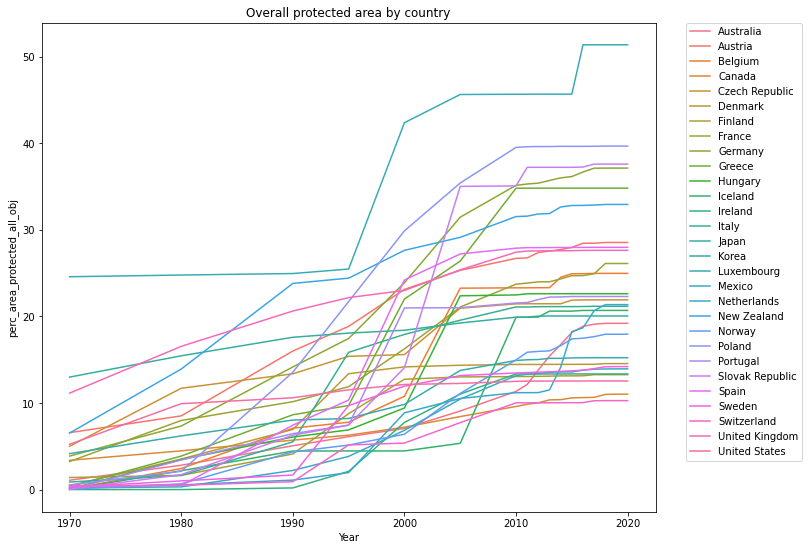

In [42]:
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Overall protected area by country')

sns.lineplot(
    data=protected_area,
    x='Year',
    y='perc_area_protected_all_obj',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [55]:
# save output for 2020
output = protected_area.reset_index()
output = output[output['Year'] == 2020]
output = output.drop(columns='Year')

OUTPUT_PATH = Path('./data/') / 'OECD' / 'protected_areas_2020.csv'
output.to_csv(OUTPUT_PATH, 

,Country,perc_area_protected_all_obj,perc_area_protected_obj_2,perc_area_protected_obj_3,perc_area_protected_obj_4,perc_area_protected_obj_1a,perc_area_protected_obj_1b,perc_area_protected_no_obj,perc_area_protected_obj_5,perc_area_protected_obj_6
16,Australia,19.20,4.17,0.24,0.27,2.01,0.57,0.34,0.98,10.63
33,Austria,28.54,2.38,0.01,5.80,0.01,0.12,4.62,15.35,0.20
50,Belgium,24.97,0.07,0.00,1.54,0.00,0.00,9.19,12.59,1.59
67,Canada,11.02,6.26,0.02,0.36,0.10,3.68,0.24,0.01,0.35
84,Czech Republic,21.91,1.06,0.33,0.98,0.04,0.04,5.16,14.29,0.00
101,Denmark,14.55,0.19,0.02,2.03,0.02,0.00,11.38,0.78,0.14
118,Finland,13.27,1.68,0.00,0.60,0.47,7.53,2.95,0.04,0.00
135,France,26.11,0.65,0.00,0.91,0.04,0.00,8.40,16.11,0.00
152,Germany,37.13,0.49,0.02,3.63,0.00,0.00,7.65,25.24,0.00
169,Greece,34.81,0.66,0.33,7.69,0.06,0.00,20.16,0.50,5.42
